In [1]:
import os 
import sys
import pickle
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.MCEstimator import MomentumTypeEstimator, DoseEstimator
from electronTransportCode.MCParticleTracer import AnalogParticleTracer, KDMC
from electronTransportCode.SimulationDomain import SimulationDomain

%matplotlib widget

In [2]:
# Typing
momentumEstimatorK1: MomentumTypeEstimator
momentumEstimatorK2: MomentumTypeEstimator
momentumEstimatorKD1: MomentumTypeEstimator
momentumEstimatorKD2: MomentumTypeEstimator
doseEstimatorK1: DoseEstimator
doseEstimatorK2: DoseEstimator
doseEstimatorKD1: DoseEstimator
doseEstimatorKD2: DoseEstimator

# Unpacking estimators
momentumEstimatorK1, doseEstimatorK1 = pickle.load(open('data/EstimatorsK1.pkl', 'rb'))
momentumEstimatorKD1, doseEstimatorKD1 = pickle.load(open('data/EstimatorsKD1.pkl', 'rb'))
momentumEstimatorK2, doseEstimatorK2 = pickle.load(open('data/EstimatorsK2.pkl', 'rb'))
momentumEstimatorKD2, doseEstimatorKD2 = pickle.load(open('data/EstimatorsKD2.pkl', 'rb'))

eSource1, NB_PARTICLES1 = pickle.load(open('data/simargv1.pkl', 'rb'))
eSource2, NB_PARTICLES2 = pickle.load(open('data/simargv1.pkl', 'rb'))

particleTracerK2: AnalogParticleTracer = pickle.load(open('data/particleTracerK2.pkl', 'rb'))
particleTracerKD2: KDMC = pickle.load(open('data/particleTracerKD2.pkl', 'rb'))
simDomain: SimulationDomain = particleTracerK2.simDomain
bins = simDomain.xbins
xBins = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
yBins = np.linspace(simDomain.ymin, simDomain.ymax, bins+1)

print(f'Type 1 particle: {eSource1=}, {NB_PARTICLES1=}')
print(f'Type 2 particle: {eSource2=}, {NB_PARTICLES2=}')

Type 1 particle: eSource1=30.0, NB_PARTICLES1=100000
Type 2 particle: eSource2=30.0, NB_PARTICLES2=100000


Diffusiontest particle

Text(0.5, 1.0, 'Energy Momentum along z axis')

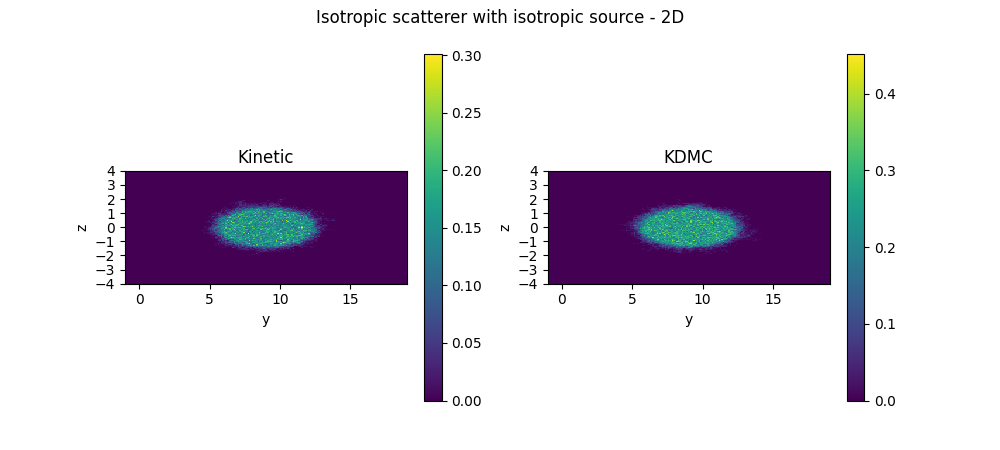

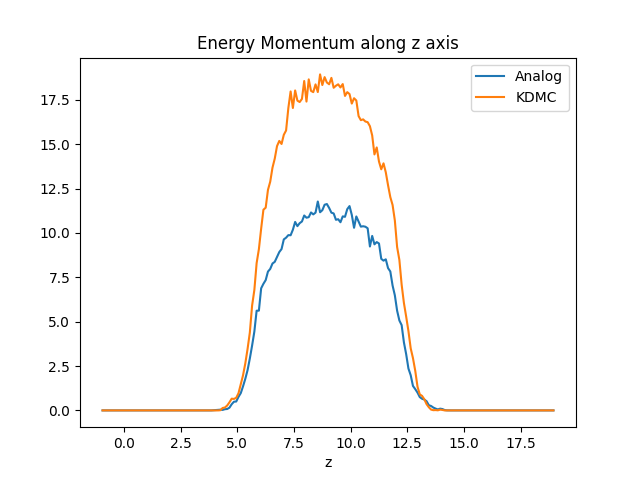

In [3]:
momentumK1 = np.reshape(momentumEstimatorK1.scoreMatrix, (bins, bins))
momentumKD1 = np.reshape(momentumEstimatorKD1.scoreMatrix, (bins, bins))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
fig1.suptitle('Isotropic scatterer with isotropic source - 2D')

pox1 = ax1.matshow(np.flipud(momentumK1), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax1.xaxis.tick_bottom()
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_title('Kinetic')
fig1.colorbar(pox1, ax=ax1)

pox2 = ax2.matshow(np.flipud(momentumKD1), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax2.xaxis.tick_bottom()
ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_title('KDMC')
fig1.colorbar(pox2, ax=ax2)

binEdge = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
binCenter = (binEdge[:-1] + binEdge[1:])/2.0
fig2, ax3 = plt.subplots()
ax3.plot(binCenter, momentumK1.sum(axis=1), label='Analog')
ax3.plot(binCenter, momentumKD1.sum(axis=1), label='KDMC')
ax3.legend()
ax3.set_xlabel('z')
ax3.set_title('Energy Momentum along z axis')

Diffusion test particle v2

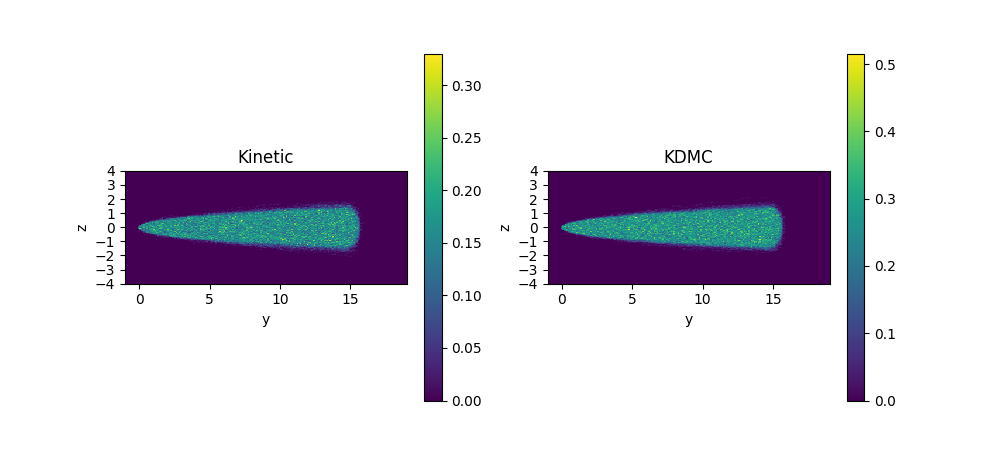

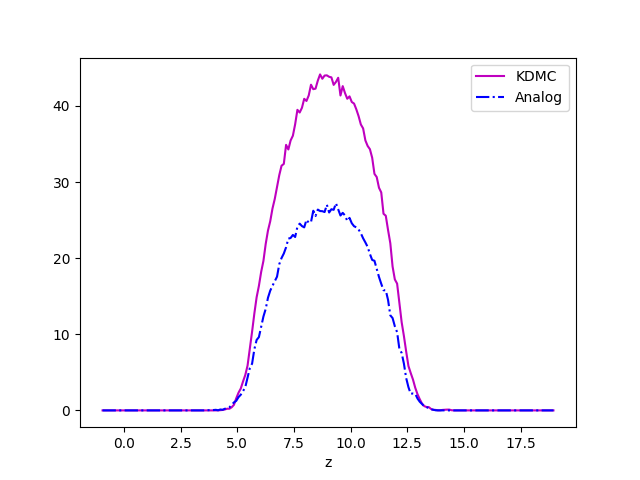

In [4]:
momentumK2 = np.reshape(momentumEstimatorK2.scoreMatrix, (bins, bins))
momentumKD2 = np.reshape(momentumEstimatorKD2.scoreMatrix, (bins, bins))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

pox1 = ax1.matshow(np.flipud(momentumK2), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax1.xaxis.tick_bottom()
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_title('Kinetic')
fig1.colorbar(pox1, ax=ax1)

pox2 = ax2.matshow(np.flipud(momentumKD2), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax2.xaxis.tick_bottom()
ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_title('KDMC')
fig1.colorbar(pox2, ax=ax2)

binEdge = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
binCenter = (binEdge[:-1] + binEdge[1:])/2.0
fig2, ax3 = plt.subplots()
ax3.plot(binCenter, momentumKD2.sum(axis=1), '-m', label='KDMC')
ax3.plot(binCenter, momentumK2.sum(axis=1), '-.b', label='Analog')
ax3.legend()
ax3.set_xlabel('z')
# ax3.set_title('Energy Momentum along z axis')

fig2.savefig('figures/zmomentum.pdf', format='pdf')

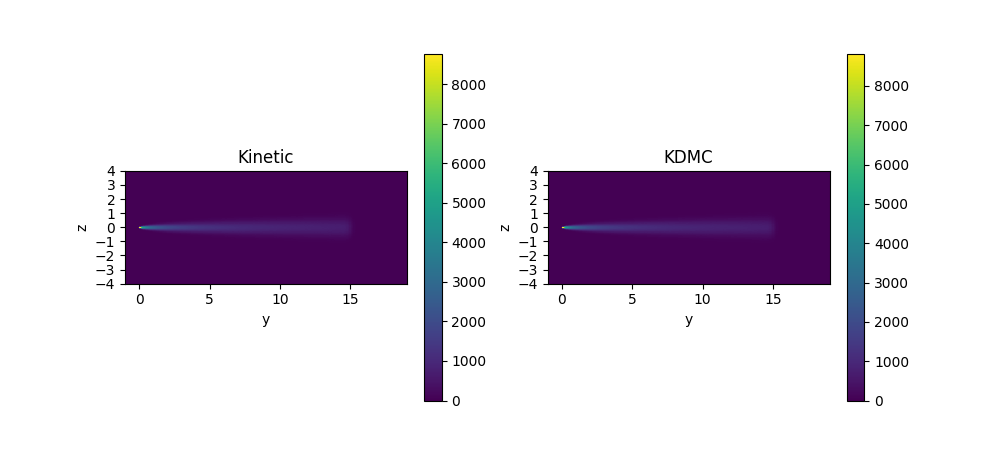

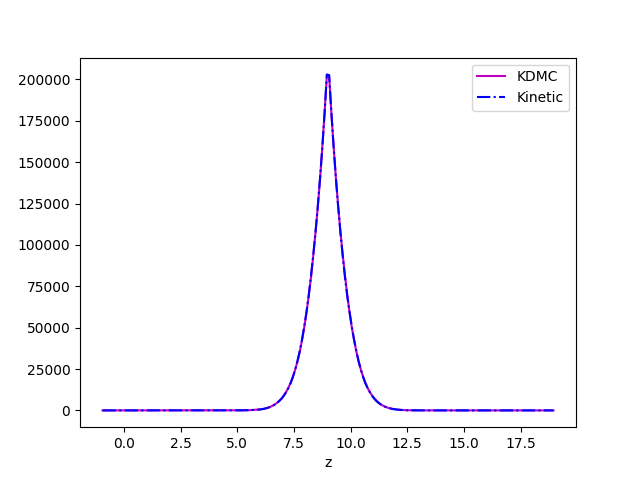

In [5]:
doseK2 = np.reshape(doseEstimatorK2.scoreMatrix, (bins, bins))
doseKD2 = np.reshape(doseEstimatorKD2.scoreMatrix, (bins, bins))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

pox1 = ax1.matshow(np.flipud(doseK2), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax1.xaxis.tick_bottom()
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_title('Kinetic')
fig1.colorbar(pox1, ax=ax1)

pox2 = ax2.matshow(np.flipud(doseKD2), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax2.xaxis.tick_bottom()
ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_title('KDMC')
fig1.colorbar(pox2, ax=ax2)

binEdge = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
binCenter = (binEdge[:-1] + binEdge[1:])/2.0
fig2, ax3 = plt.subplots()
ax3.plot(binCenter, doseKD2.sum(axis=1), '-m', label='KDMC')
ax3.plot(binCenter, doseK2.sum(axis=1), '-.b', label='Kinetic')
ax3.legend()
ax3.set_xlabel('z')
# ax3.set_title('Dose along z axis')
fig2.savefig('figures/dose.pdf', format='pdf')